In [1]:
from matplotlib.pylab import *
import pandas as pd
from scipy import stats

In [2]:
rainfall = list(map(int, open('data.csv').read().split(', ')))

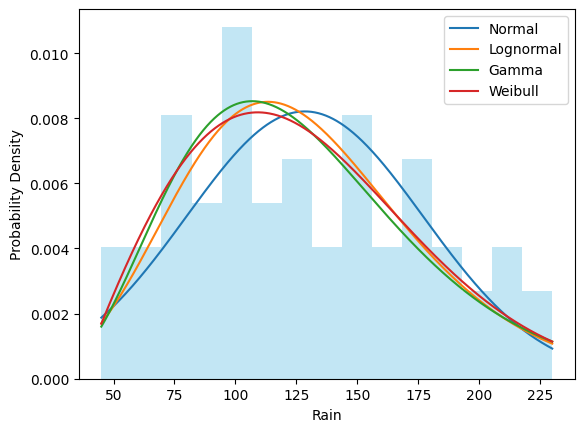

In [3]:
distributions = {
    'Normal': stats.norm,
    'Lognormal': stats.lognorm,
    'Gamma': stats.gamma,
    'Weibull': stats.weibull_min,
}

x = linspace(min(rainfall), max(rainfall), 1000)


for label, dist in distributions.items():
    y = dist.pdf(x, *dist.fit(rainfall))

    plot(x, y, label=label)

hist(
    rainfall,
    bins=15,
    density=True,
    alpha=0.5,
    color='skyblue',
)
xlabel('Rain')
ylabel('Probability Density')
legend()

In [4]:
for label, dist in distributions.items():

    ks_stat, p_value = stats.kstest(
        rainfall,
        dist.cdf,
        args=dist.fit(rainfall),
    )
    print(label, ks_stat, p_value)

Normal 0.09146568504178865 0.6630185819276613
Lognormal 0.07049286362523255 0.906186963992625
Gamma 0.07445637663469917 0.8688518543092181
Weibull 0.0643737101780042 0.9511716275293058


In [5]:
# , floc=None if name == 'norm' else 0